In [1]:
import argparse
from ray.tune import Analysis
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
logdir = '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/docking_2d/expr_20210914_005226'

In [58]:
all_subdirs = next(os.walk(logdir))[1]

In [59]:
csv_file_tracker = []
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        csv_file_tracker.append(csv_path)


In [60]:
data_dfs = [pd.read_csv(csv_file_tracker[i]) for i in range(len(csv_file_tracker))]

In [61]:
data_dfs[7]

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-16.522226,-95.561034,-59.017808,2001.00,6,6,12006,False,6,1,...,7.587500,0.20,0.00005,0.317946,-0.033743,0.347064,0.919953,0.023121,4.770771,0.0
1,-15.797937,-95.561034,-38.853963,2001.00,6,6,24012,False,12,2,...,7.692308,0.30,0.00005,0.242387,-0.027753,0.265388,0.715964,0.015844,4.760040,0.0
2,-15.288042,-95.561034,-31.672955,2001.00,6,6,36018,False,18,3,...,7.664286,0.30,0.00005,0.243430,-0.019592,0.258940,0.472841,0.013609,4.753547,0.0
3,-10.264062,-95.561034,-26.969822,2001.00,6,6,48024,False,24,4,...,7.597500,0.30,0.00005,0.292381,-0.017831,0.306765,0.423758,0.011490,4.742457,0.0
4,-8.125469,-95.561034,-23.613352,1995.20,6,6,59856,False,30,5,...,7.600000,0.30,0.00005,0.332009,-0.012001,0.340602,0.243164,0.011360,4.734168,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.349208,-7.230554,-6.139061,1990.09,6,6,5937262,False,2976,496,...,6.500000,0.45,0.00005,0.119406,-0.049374,0.161460,0.691356,0.016268,2.837859,0.0
496,4.349208,-7.230554,-6.149344,1990.09,6,6,5949268,False,2982,497,...,6.500000,0.45,0.00005,0.250799,-0.043037,0.286957,0.475854,0.015287,3.108886,0.0
497,4.349208,-7.230554,-6.175947,1990.09,6,6,5961274,False,2988,498,...,6.500000,0.45,0.00005,0.106934,-0.040097,0.140601,0.735794,0.014288,2.521233,0.0
498,4.349208,-7.230554,-6.191921,1990.09,6,6,5973280,False,2994,499,...,6.500000,0.45,0.00005,0.035706,-0.039577,0.068499,0.870898,0.015076,2.466151,0.0


In [62]:
new_data_dfs = [data_dfs[0],data_dfs[1],data_dfs[7]]

In [63]:
new_data_dfs[2]

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-16.522226,-95.561034,-59.017808,2001.00,6,6,12006,False,6,1,...,7.587500,0.20,0.00005,0.317946,-0.033743,0.347064,0.919953,0.023121,4.770771,0.0
1,-15.797937,-95.561034,-38.853963,2001.00,6,6,24012,False,12,2,...,7.692308,0.30,0.00005,0.242387,-0.027753,0.265388,0.715964,0.015844,4.760040,0.0
2,-15.288042,-95.561034,-31.672955,2001.00,6,6,36018,False,18,3,...,7.664286,0.30,0.00005,0.243430,-0.019592,0.258940,0.472841,0.013609,4.753547,0.0
3,-10.264062,-95.561034,-26.969822,2001.00,6,6,48024,False,24,4,...,7.597500,0.30,0.00005,0.292381,-0.017831,0.306765,0.423758,0.011490,4.742457,0.0
4,-8.125469,-95.561034,-23.613352,1995.20,6,6,59856,False,30,5,...,7.600000,0.30,0.00005,0.332009,-0.012001,0.340602,0.243164,0.011360,4.734168,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.349208,-7.230554,-6.139061,1990.09,6,6,5937262,False,2976,496,...,6.500000,0.45,0.00005,0.119406,-0.049374,0.161460,0.691356,0.016268,2.837859,0.0
496,4.349208,-7.230554,-6.149344,1990.09,6,6,5949268,False,2982,497,...,6.500000,0.45,0.00005,0.250799,-0.043037,0.286957,0.475854,0.015287,3.108886,0.0
497,4.349208,-7.230554,-6.175947,1990.09,6,6,5961274,False,2988,498,...,6.500000,0.45,0.00005,0.106934,-0.040097,0.140601,0.735794,0.014288,2.521233,0.0
498,4.349208,-7.230554,-6.191921,1990.09,6,6,5973280,False,2994,499,...,6.500000,0.45,0.00005,0.035706,-0.039577,0.068499,0.870898,0.015076,2.466151,0.0


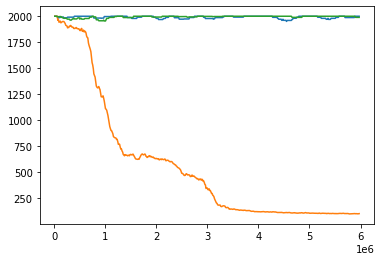

In [64]:
new_data_dfs[0]
timesteps = new_data_dfs[0]['timesteps_total']
eps_len_0 = new_data_dfs[0]['episode_len_mean']
eps_len_1 = new_data_dfs[1]['episode_len_mean']
eps_len_2 = new_data_dfs[2]['episode_len_mean']

plt.figure()
plt.plot(timesteps,eps_len_0)
plt.plot(timesteps,eps_len_1)
plt.plot(timesteps,eps_len_2)


In [65]:
# consume one df at a time
# fill up appropriate values 
key_timesteps = 'timesteps_total'
key_eps_len_mean = 'episode_len_mean'
key_success_mean = 'custom_metrics/outcome/success_mean'
key_eps_reward_mean = 'episode_reward_mean'


timesteps_total_track = []
episode_len_mean_track = []
success_mean_track = []
eps_reward_mean_track = []

for ds in data_dfs: 
    for i in range(ds.shape[0]):                
        timestep_total = ds.iloc[[i]][key_timesteps][i]
        episode_len_mean = ds.iloc[[i]][key_eps_len_mean][i]
        success_mean = ds.iloc[[i]][key_success_mean][i]
        reward_mean = ds.iloc[[i]][key_eps_reward_mean][i]
        
        timesteps_total_track.append(timestep_total)
        episode_len_mean_track.append(episode_len_mean)
        success_mean_track.append(success_mean)
        eps_reward_mean_track.append(reward_mean)




In [66]:
timesteps_total_v_episode_len_mean = pd.DataFrame()
timesteps_total_v_episode_len_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_episode_len_mean[key_eps_len_mean] = episode_len_mean_track

Text(0.5, 0.98, 'Docking 2D Episode Length')

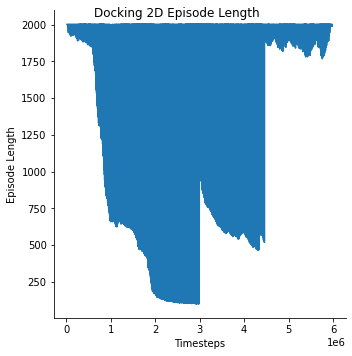

In [67]:
episode_mean_len_plot = sns.relplot(data=timesteps_total_v_episode_len_mean,x='timesteps_total',y='episode_len_mean',kind='line')
episode_mean_len_plot.set_axis_labels("Timesteps","Episode Length")
episode_mean_len_plot.fig.suptitle("Docking 2D Episode Length")


In [34]:
iters = 0
all_data = pd.DataFrame()
for path in csv_file_tracker: 
    current_data = pd.read_csv(path)
    if iters == 0:
        all_data['timesteps_total'] = current_data['timesteps_total']
        all_data['episode_len_mean' + '_' + str(iters)] = current_data['episode_len_mean']
    else: 
        all_data['episode_len_mean' + '_' + str(iters)] = current_data['episode_len_mean']
    iters += 1

In [35]:
all_data

,timesteps_total,episode_len_mean_0,episode_len_mean_1,episode_len_mean_2,episode_len_mean_3,episode_len_mean_4,episode_len_mean_5,episode_len_mean_6,episode_len_mean_7,episode_len_mean_8,episode_len_mean_9
0,12006,2001.00,2001.000000,2001.0,2001.00,2001.00,2001.000,2001.000000,2001.00,2001.000000,2001.00
1,24012,2001.00,2001.000000,2001.0,2001.00,2001.00,2001.000,2001.000000,2001.00,2001.000000,2001.00
2,36018,2001.00,2001.000000,2001.0,2001.00,2001.00,2001.000,2001.000000,2001.00,2001.000000,2001.00
3,48024,2001.00,1983.041667,2001.0,2001.00,2001.00,1997.125,1984.083333,2001.00,1944.208333,2001.00
4,60030,2001.00,1986.633333,2001.0,1995.20,2001.00,1997.900,1950.633333,2001.00,1955.566667,2001.00
...,...,...,...,...,...,...,...,...,...,...,...
495,4430227,548.77,463.230000,2001.0,1990.09,1889.79,1921.370,1877.330000,102.22,2001.000000,1979.09
496,4436514,532.88,466.100000,2001.0,1990.09,1888.62,1934.110,1864.930000,101.10,2001.000000,1979.09
497,4443650,526.28,464.600000,2001.0,1990.09,1888.62,1944.650,1875.890000,100.58,2001.000000,1979.09
498,4450160,524.19,477.660000,2001.0,1990.09,1922.31,1956.320,1866.560000,101.60,2001.000000,1979.09


<h> Success and Reward Graphs </h>

In [23]:
timesteps_total_v_success_mean = pd.DataFrame()
timesteps_total_v_success_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_success_mean['success_mean'] = success_mean_track

Text(0.5, 0.98, 'Docking 2D Success Rate')

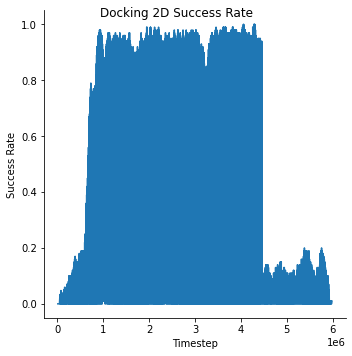

In [33]:
success_mean_plot = sns.relplot(data=timesteps_total_v_success_mean,x='timesteps_total',y='success_mean',kind='line')
success_mean_plot.set_axis_labels("Timestep","Success Rate")
success_mean_plot.fig.suptitle("Docking 2D Success Rate") 

In [26]:
timesteps_total_v_episode_reward_mean = pd.DataFrame()
timesteps_total_v_episode_reward_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_episode_reward_mean['episode_reward_mean'] = eps_reward_mean_track


Text(0.5, 0.98, 'Rejoin 2D - Average Return Over Time')

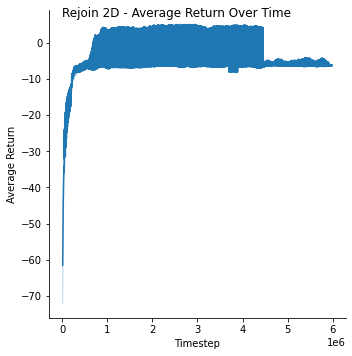

In [27]:
reward_plot = sns.relplot(data=timesteps_total_v_episode_reward_mean,x='timesteps_total',y='episode_reward_mean',ci='sd',kind='line')
reward_plot.set_axis_labels("Timestep","Average Return")
reward_plot.fig.suptitle("Rejoin 2D - Average Return Over Time") 

In [20]:
timesteps = data_dfs[0]['timesteps_total']
episode_len_mean = data_dfs[0]['episode_len_mean']
success_mean = data_dfs[0][key_success_mean]
reward_mean = data_dfs[0][key_eps_reward_mean]

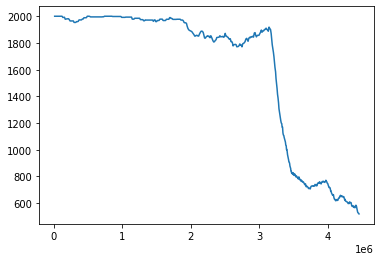

In [21]:
plt.plot(timesteps,episode_len_mean)

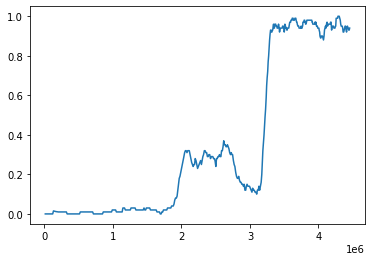

In [22]:
plt.plot(timesteps,success_mean)

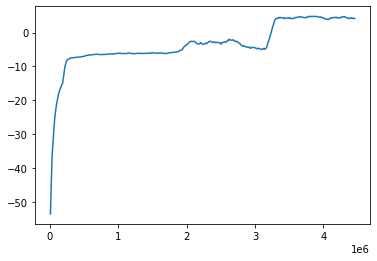

In [29]:
plt.plot(timesteps,reward_mean)